In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

In [2]:
# params

nx = 500
ny = 500
nz = 50
dx = 2000
dy = 2000

loc0 = "/scratch/hcm7920/amb"
conc = ["0","100"]
dI   = 30
tSkip  = 4
myLevs = [0,5,10,15,20,25]

In [3]:
eddyScale = np.zeros(shape=(len(conc),len(myLevs),ny-2,nx-2))

In [4]:

for ic in range(len(conc)):
    
    phiHyd = nc.Dataset(loc0+conc[ic]+f"/data/phiHyd.nc")["phiHyd"]
    levsP   = nc.Dataset(loc0+conc[ic]+f"/data/phiHyd.nc")["Z"]
    timeP   = nc.Dataset(loc0+conc[ic]+f"/data/phiHyd.nc")["T"]
    
    for il in range(len(myLevs)):
    
        phiHyd2  = phiHyd[3::tSkip,il,:,:]**2
        phiHydDX = (phiHyd[3::tSkip,il,1:-1,2:]-phiHyd[3::tSkip,il,1:-1,:-2])/(2*dx)
        phiHydDY = (phiHyd[3::tSkip,il,2:,1:-1]-phiHyd[3::tSkip,il,:-2,1:-1])/(2*dy)
        phiHydG2 = phiHydDX**2 + phiHydDY**2

        phiHyd2  = phiHyd2.mean((0,))
        phiHydG2 = phiHydG2.mean((0,))

        eddyScale[ic,il,:,:] = np.sqrt(phiHyd2[1:-1,1:-1]/phiHydG2)
        
        print(f"Done w lev {il}")



Done w lev 0
Done w lev 1
Done w lev 2
Done w lev 3
Done w lev 4
Done w lev 5
Done w lev 0
Done w lev 1
Done w lev 2
Done w lev 3
Done w lev 4
Done w lev 5


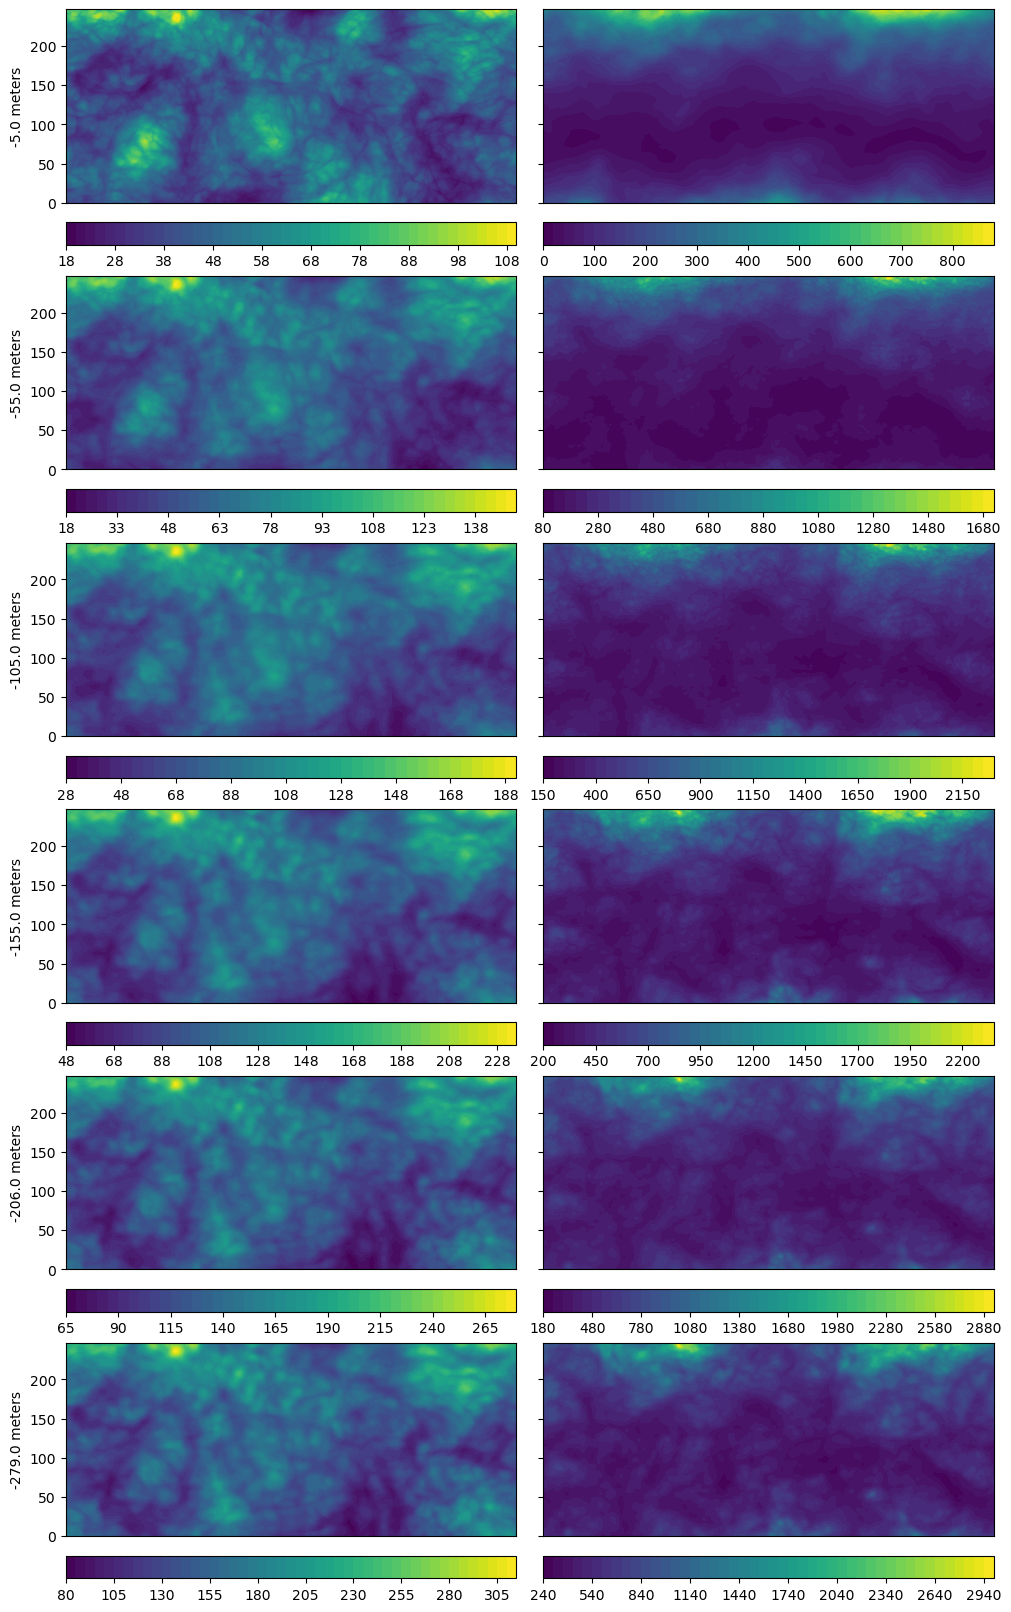

In [5]:
fig,ax = plt.subplots(len(myLevs),2,figsize=(10,16),layout='constrained',
                      sharey=True)
for ic in range(len(conc)):
    for il in range(len(myLevs)):
        im = ax[il,ic].contourf(eddyScale[ic,il,125:-125,:]/1000,50)
        plt.colorbar(im,location="bottom",shrink=1)
        ax[il,ic].tick_params(axis='x', which='both',    
                       bottom=False, top=False,         
                       labelbottom=False)
        if ic==0:
            ax[il,ic].set_ylabel(f"{levsP[myLevs[il]].round(0)} meters")


In [8]:
averaged = eddyScale[:,:,150:-150,:].mean((2,3))

# ke spectra

In [7]:

# params
loc0 = "/scratch/hcm7920/amb"
conc = ["0","100"]
dI   = 30
tSkip  = 4
myLevs = [0,5,10,15,20,25]

In [10]:
averaged/1000

array([[ 44.56679403,  56.51004429,  77.81453827, 101.81064134,
        124.94281946, 147.20488172],
       [100.07336389, 215.09084643, 347.83721147, 436.29295655,
        494.86089528, 544.37975896]])